In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 150

In [3]:
disease = pd.read_csv("Data/Disease Dataset.csv",index_col=False)

In [4]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
#Phantom column at 133 exists
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [7]:
disease.shape

(4920, 134)

In [8]:
#no missing values except for column #133
disease.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [9]:
disease.sum()

itching                                                                         678
skin_rash                                                                       786
nodal_skin_eruptions                                                            108
continuous_sneezing                                                             222
shivering                                                                       108
chills                                                                          798
joint_pain                                                                      684
stomach_pain                                                                    222
acidity                                                                         222
ulcers_on_tongue                                                                108
muscle_wasting                                                                  108
vomiting                                                                    

In [10]:
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [11]:
#drop phantom column 133
disease.dropna(how='all', axis='columns')

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [12]:
#unnamed column still appears
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [13]:
#found this solution to rename with dict, then drop
disease.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
disease.drop(["a"], axis=1, inplace=True)

In [14]:
#finally gone
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [15]:
#drop fluid_overload1
disease = disease.drop(['fluid_overload.1'], axis = 1)

In [16]:
disease.prognosis.value_counts()

GERD                                       120
Heart attack                               120
Impetigo                                   120
Pneumonia                                  120
Allergy                                    120
Psoriasis                                  120
Urinary tract infection                    120
Paralysis (brain hemorrhage)               120
hepatitis A                                120
Cervical spondylosis                       120
AIDS                                       120
Hypertension                               120
Dimorphic hemmorhoids(piles)               120
Tuberculosis                               120
Varicose veins                             120
Osteoarthristis                            120
Arthritis                                  120
Jaundice                                   120
Typhoid                                    120
Migraine                                   120
Hepatitis E                                120
Gastroenterit

In [17]:
#copy values of prognosis to new column triage
disease['triage'] = disease['prognosis'].values

In [18]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection


In [19]:
#map triage categories from prognosis to triage column

#triage category can be changed using the dictionary

#1 Immediate Care Need
#2 Care Needed within a week
#3 Address at next visit
#4 Need more information for triage

disease = disease.replace({'triage': {'Paralysis (brain hemorrhage)':1,'Pneumonia':1,'Bronchial Asthma':1,'Tuberculosis':1,
                            'Typhoid':1, 'Chicken pox':1,'Heart attack':1,'Drug Reaction':1, 'Malaria':1, 'Dengue':1,
                            'Fungal infection': 2,'Hepatitis E':2,'Alcoholic hepatitis':2, 'Hepatitis B':2,'Hepatitis C':2,
                            'hepatitis A':2, 'Urinary tract infection':2, 'AIDS':2,'Allergy':4,'Psoriasis':3,'Acne':3,
                           'Arthritis':3,'(vertigo) Paroymsal  Positional Vertigo':3,'Dimorphic hemmorhoids(piles)':3,
                           'Osteoarthristis':3,'GERD':3,'Migraine':3,'Hyperthyroidism':3,'Varicose veins':3,'Hepatitis D':1,
                           'Common Cold':4,'Impetigo':4,'Hypertension ':4,'Cervical spondylosis':4,'Diabetes ':4,
                            'Gastroenteritis':4,'Jaundice':4,'Chronic cholestasis':4,'Peptic ulcer diseae':4,'Hypoglycemia':4,
                                      'Hypothyroidism':3}})

In [20]:
#confirm all triage changes have been made
disease.triage.value_counts()

3    1320
1    1320
4    1320
2     960
Name: triage, dtype: int64

In [21]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [22]:
disease.shape

(4920, 133)

# Triage System Model building

In [23]:
#Split data for random forests
X = disease.iloc[:,0:131].values
y = disease.iloc[:,132].values
print('The independent features set: ')
print(X)
print('The dependent variable: ')
print(y)

The independent features set: 
[[1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 1 1 1]]
The dependent variable: 
[2 2 2 ... 2 3 4]


In [24]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 268    0    0    0
2                   0  216    0    0
3                   0    0  258    0
4                   0    0    0  242


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

Data Leakage is likely, we need to clean the dataset to remove interrelated features

In [29]:
features = list(zip(disease.columns[0:130], classifier.feature_importances_))

features.sort(key=lambda x:x[1])

zero_impact_features = []
lame_features = []
contributing_features = []
for i in features:
    print(i)
    if i[1] == 0.0:
        zero_impact_features.append(i)
    else:
        contributing_features.append(i)

('weight_gain', 0.0)
('fluid_overload', 0.0)
('blurred_and_distorted_vision', 0.0)
('runny_nose', 0.0)
('congestion', 0.0)
('fast_heart_rate', 0.0)
('irritation_in_anus', 0.0)
('swollen_legs', 0.0)
('puffy_face_and_eyes', 0.0)
('brittle_nails', 0.0)
('visual_disturbances', 0.0)
('hip_joint_pain', 7.26052226709957e-06)
('rusty_sputum', 5.282845114199693e-05)
('swollen_extremeties', 7.734221642198666e-05)
('skin_peeling', 0.00015230479006820563)
('movement_stiffness', 0.00024229683866903323)
('neck_pain', 0.0002518569146171814)
('pain_behind_the_eyes', 0.0002767883283294693)
('receiving_unsterile_injections', 0.00033340146774597177)
('toxic_look_(typhos)', 0.0003492663989212586)
('knee_pain', 0.00035475079178222657)
('back_pain', 0.0006283460659034223)
('bruising', 0.0006415350767920246)
('phlegm', 0.000891087548945541)
('blood_in_sputum', 0.0010394123892881592)
('swollen_blood_vessels', 0.0011325263426955928)
('silver_like_dusting', 0.0011797587769451262)
('lethargy', 0.0012963051628974

In [30]:
print(zero_impact_features)

[('weight_gain', 0.0), ('fluid_overload', 0.0), ('blurred_and_distorted_vision', 0.0), ('runny_nose', 0.0), ('congestion', 0.0), ('fast_heart_rate', 0.0), ('irritation_in_anus', 0.0), ('swollen_legs', 0.0), ('puffy_face_and_eyes', 0.0), ('brittle_nails', 0.0), ('visual_disturbances', 0.0)]


Not clear if any particular features are causing the data leakage. I will implent cramers test to assess relatedness of symptoms

In [31]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [32]:
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

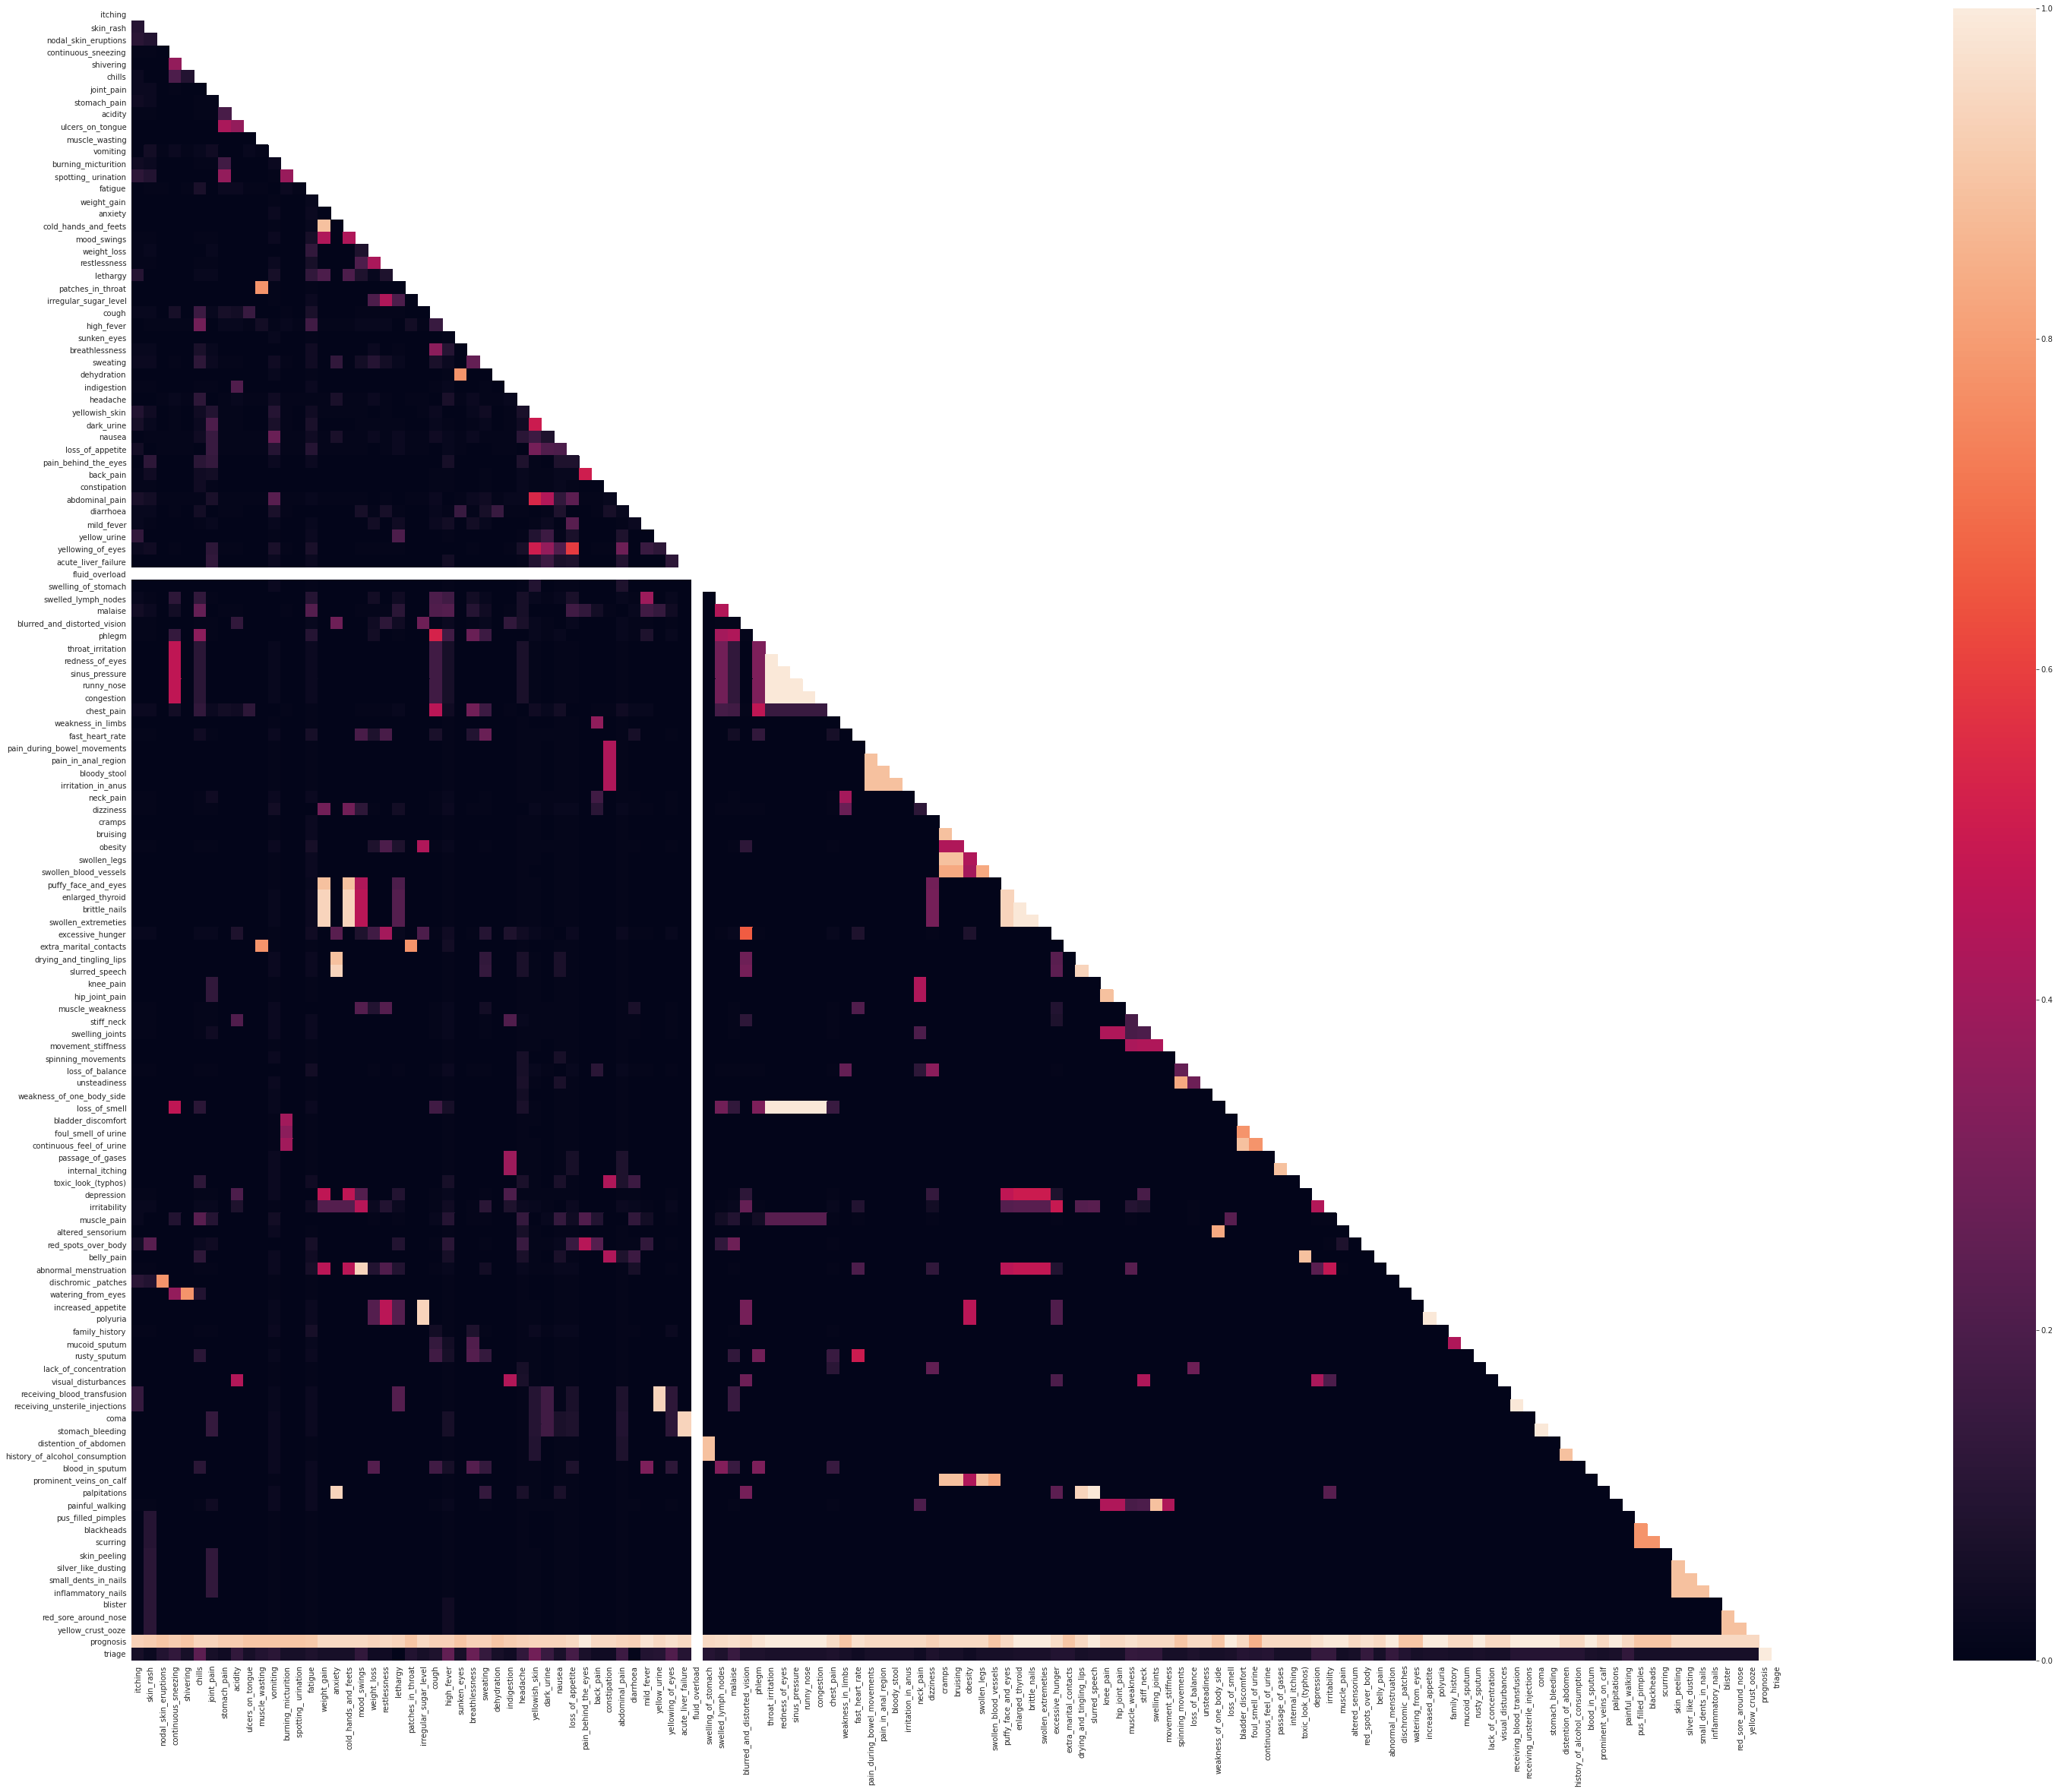

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [34]:
# We will drop features that have a cramers score higher than ~.4
disease = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases'],axis = 1)

In [35]:
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

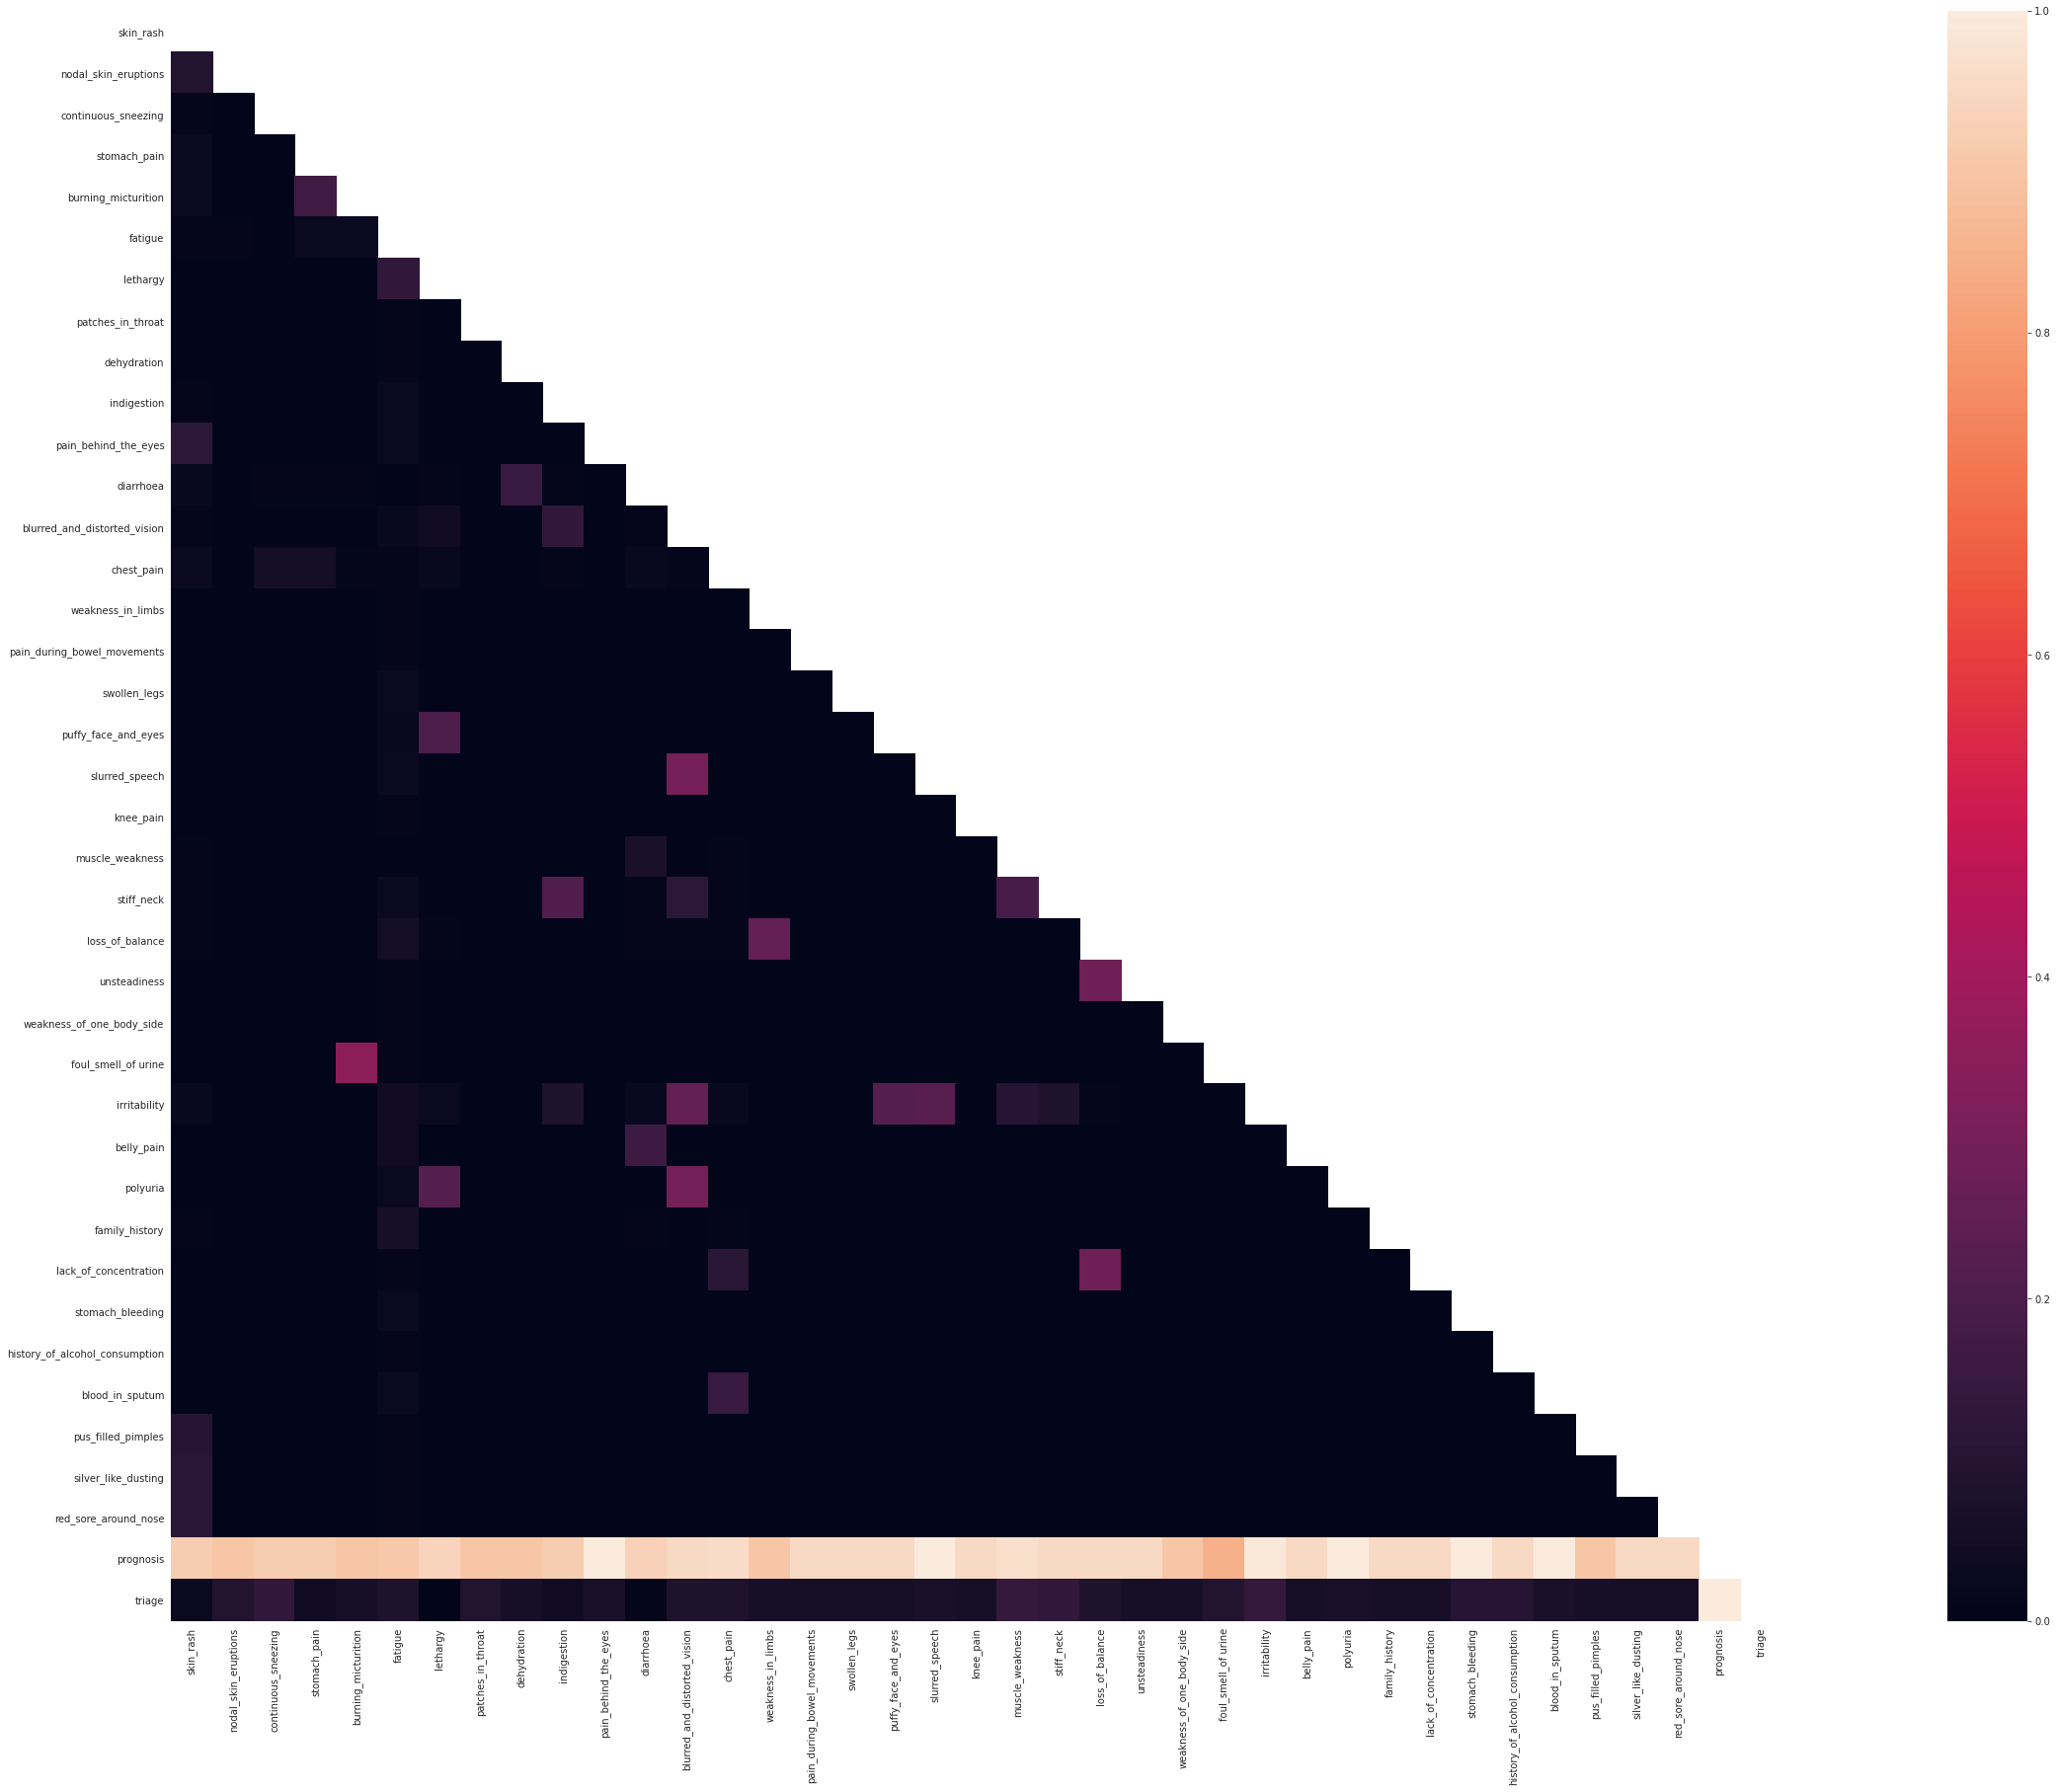

In [36]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [37]:
#major clusters pf highly related features are gone
df

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,prognosis,triage
skin_rash,1.00,0.09,0.01,0.03,0.03,0.01,0.00,0.00,0.00,0.01,0.12,0.02,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.10,0.11,0.11,0.92,0.03
nodal_skin_eruptions,0.09,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.09
continuous_sneezing,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.13
stomach_pain,0.03,0.00,0.00,1.00,0.17,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04
burning_micturition,0.03,0.00,0.00,0.17,1.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.06
fatigue,0.01,0.01,0.00,0.03,0.03,1.00,0.13,0.01,0.01,0.03,0.03,0.00,0.02,0.01,0.01,0.01,0.03,0.02,0.03,0.01,0.00,0.03,0.05,0.01,0.01,0.01,0.04,0.04,0.03,0.06,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.91,0.08
lethargy,0.00,0.00,0.00,0.00,0.00,0.13,1.00,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.00
patches_in_throat,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.09
dehydration,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.99,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.06
indigestion,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,1.00,0.00,0.01,0.13,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04


In [38]:
#Split data for random forests
y = disease['triage']
X = disease.drop(['triage','prognosis'], axis =1)

In [39]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 42)

In [40]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 789   87    0  123
2                  93  593    0   31
3                   3   13  957   13
4                  14    5    8  961


In [43]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9024390243902439

In [44]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.8943089430894309

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.79      0.83       999
           2       0.85      0.83      0.84       717
           3       0.99      0.97      0.98       986
           4       0.85      0.97      0.91       988

    accuracy                           0.89      3690
   macro avg       0.89      0.89      0.89      3690
weighted avg       0.90      0.89      0.89      3690



Data leakage appears to be removed from the model, I will now assess remaining features for ways to tune the model.

In [46]:
features = list(zip(disease.columns[0:130], classifier.feature_importances_))
features.sort(key=lambda x:x[1])
for i in features:
    print(i)
    

('slurred_speech', 0.005971933747742583)
('belly_pain', 0.006492392443640895)
('puffy_face_and_eyes', 0.007039224957479251)
('blood_in_sputum', 0.007544373778083962)
('weakness_in_limbs', 0.011034995770031619)
('pain_behind_the_eyes', 0.013902283720695094)
('polyuria', 0.017876154676488818)
('pus_filled_pimples', 0.018163527616250404)
('silver_like_dusting', 0.018174766530979724)
('dehydration', 0.018986397081926096)
('lack_of_concentration', 0.019185824926843436)
('unsteadiness', 0.019523420901357207)
('foul_smell_of urine', 0.020196532741839943)
('red_sore_around_nose', 0.020788023655939934)
('family_history', 0.023914294910528777)
('pain_during_bowel_movements', 0.024975215976625106)
('patches_in_throat', 0.02573433041690126)
('weakness_of_one_body_side', 0.025845275841853897)
('nodal_skin_eruptions', 0.026949072514413933)
('indigestion', 0.027294352458127055)
('burning_micturition', 0.027846002455976064)
('stomach_bleeding', 0.027999257036936336)
('knee_pain', 0.02887119095910803)


# Feature analysis using SHAP

In [47]:
import shap
shap.initjs()

In [48]:
explainer = shap.TreeExplainer(classifier)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [49]:
shap_values = explainer.shap_values(X_test, check_additivity=False)

In [50]:
shap_values

[array([[ 0.01147676,  0.01020494,  0.01433663, ...,  0.0067953 ,
          0.00764027,  0.00468766],
        [ 0.008937  ,  0.00529542,  0.01215008, ..., -0.09002375,
          0.00357585,  0.0026214 ],
        [-0.01756475,  0.00228813,  0.01215862, ...,  0.00201562,
          0.00137624,  0.0017557 ],
        ...,
        [-0.01938003,  0.00279801,  0.01050467, ...,  0.00230295,
          0.00219147,  0.00184407],
        [-0.01938003,  0.00279801,  0.01050467, ...,  0.00230295,
          0.00219147,  0.00184407],
        [ 0.0099054 ,  0.00727428,  0.02099442, ...,  0.00808588,
          0.0069524 ,  0.00909473]]),
 array([[ 0.06479056, -0.06496669,  0.01252056, ...,  0.04902705,
          0.03928091,  0.02233928],
        [-0.02142951, -0.03962416,  0.00549712, ..., -0.14612817,
          0.00932027,  0.00661381],
        [ 0.00960461, -0.00634533,  0.00329876, ...,  0.0024671 ,
          0.00171701,  0.00181485],
        ...,
        [-0.00224059, -0.02120746,  0.00406912, ...,  0.00428196,
          0.00361657,  0.00321223],
        [-0.00224059, -0.02120746,  0.00406912, ...,  0.00428196,
          0.00361657,  0.00321223],
        [-0.00891096, -0.01900859,  0.00506129, ...,  0.00556757,
          0.00449424,  0.00375904]]),
 array([[ 0.11220759,  0.04703074,  0.01828683, ..., -0.05973906,
         -0.05773974,  0.02201673],
        [ 0.14774657,  0.02993596,  0.01692992, ...,  0.31604038,
         -0.01702424,  0.01781053],
        [-0.00237377,  0.00231753,  0.00540622, ..., -0.00575067,
         -0.00421466,  0.00150328],
        ...,
        [-0.01312093,  0.00642478,  0.00766235, ..., -0.01341764,
         -0.01165048,  0.00359002],
        [-0.01312093,  0.00642478,  0.00766235, ..., -0.01341764,
         -0.01165048,  0.00359002],
        [-0.02209073,  0.0063754 ,  0.00705433, ..., -0.01655857,
         -0.01482129,  0.00371002]]),
 array([[-0.18847491,  0.00773102, -0.04514403, ...,  0.00391671,
          0.01081856, -0.04904367],
        [-0.13525406,  0.00439277, -0.03457713, ..., -0.07988846,
          0.00412812, -0.02704575],
        [ 0.0103339 ,  0.00173967, -0.0208636 , ...,  0.00126795,
          0.0011214 , -0.00507383],
        ...,
        [ 0.03474154,  0.01198467, -0.02223614, ...,  0.00683273,
          0.00584244, -0.00864632],
        [ 0.03474154,  0.01198467, -0.02223614, ...,  0.00683273,
          0.00584244, -0.00864632],
        [ 0.02109628,  0.00535891, -0.03311003, ...,  0.00290511,
          0.00337465, -0.01656379]])]

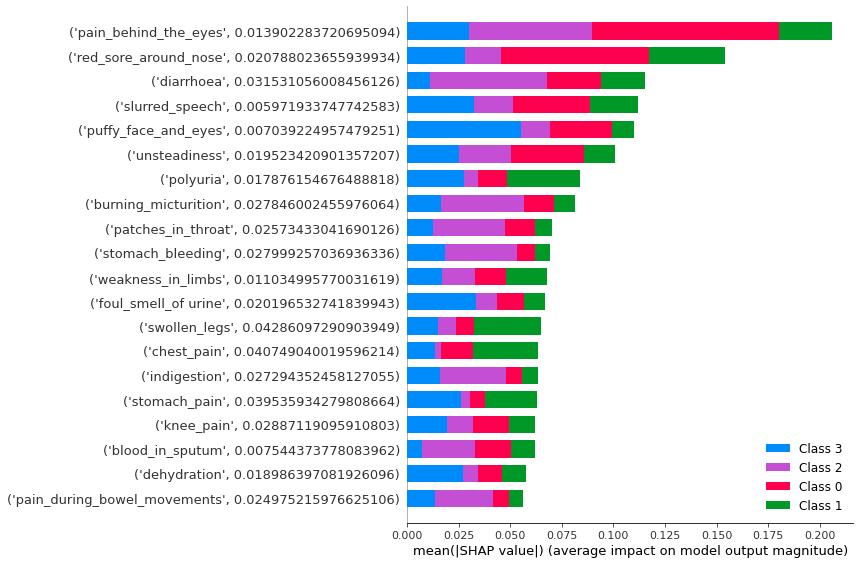

In [51]:
shap.summary_plot(shap_values, X_test, features)

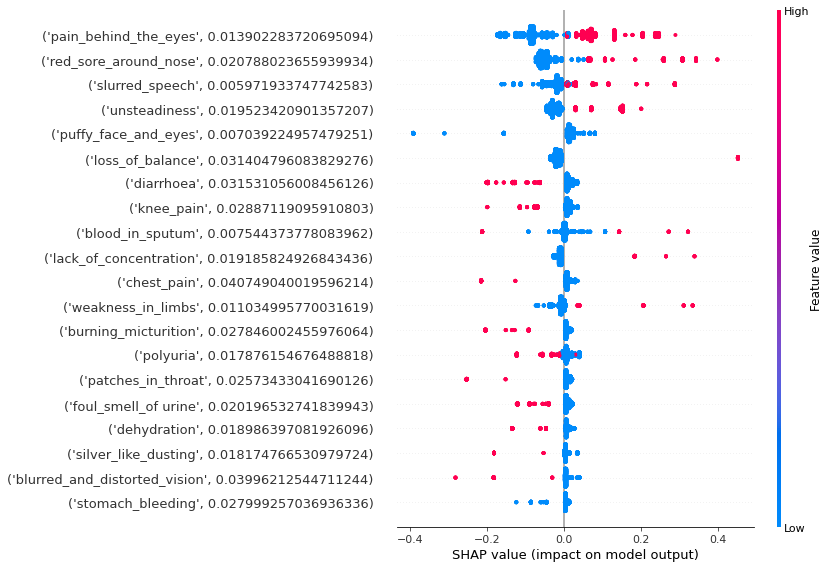

In [52]:
shap.summary_plot(shap_values[0], X_test, features)

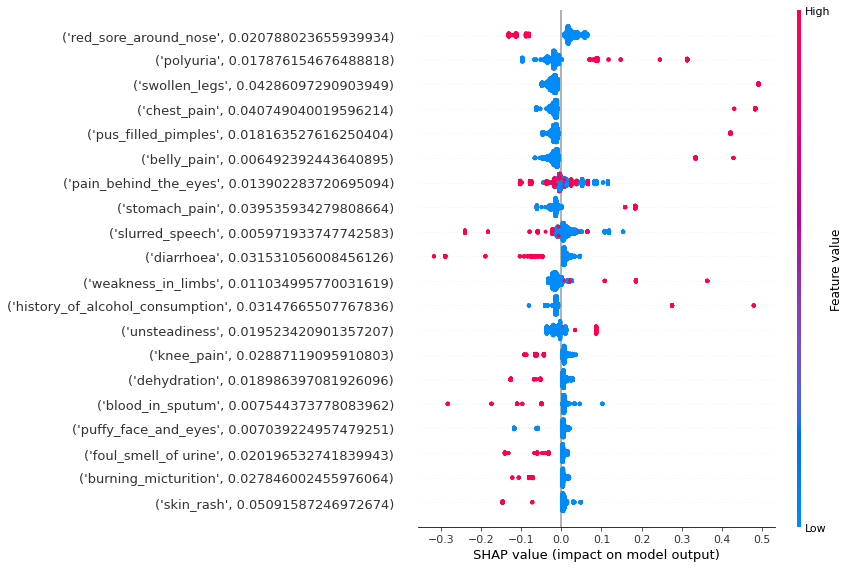

In [53]:
shap.summary_plot(shap_values[1], X_test, features)

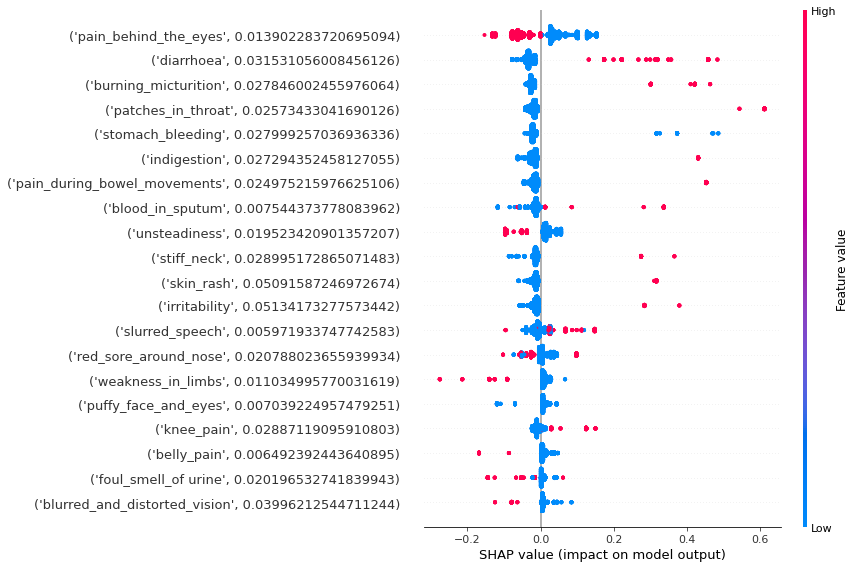

In [54]:
shap.summary_plot(shap_values[2], X_test, features)

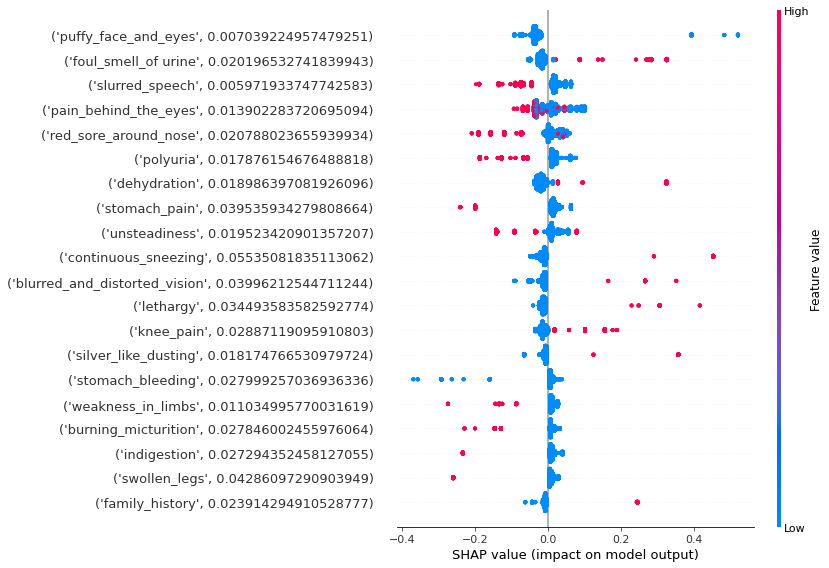

In [55]:
shap.summary_plot(shap_values[3], X_test, features)

# Assesing Feature importance by recursively dropping features 

In [56]:
#determining feature importances
from sklearn.base import clone

X_train = pd.DataFrame(X_train)

model_clone = clone(classifier)
model_clone.random_state = 42
model_clone.fit(X_train, y_train)
benchmark_score = model_clone.score(X_train, y_train)
importances = []

for col in X_train.columns:
    model_clone = clone(classifier)
    model_clone.random_state = 42
    model_clone.fit(X_train.drop(col, axis = 1), y_train)
    drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
    importances.append(benchmark_score - drop_col_score)
    
for (a,b) in zip(disease.columns, importances):
    print(a ,"; Importance: ", b)

skin_rash ; Importance:  0.028455284552845517
nodal_skin_eruptions ; Importance:  0.003252032520325243
continuous_sneezing ; Importance:  0.015447154471544766
stomach_pain ; Importance:  0.025203252032520385
burning_micturition ; Importance:  0.007317073170731714
fatigue ; Importance:  0.004878048780487809
lethargy ; Importance:  0.023577235772357708
patches_in_throat ; Importance:  0.019512195121951237
dehydration ; Importance:  0.013008130081300862
indigestion ; Importance:  0.0
pain_behind_the_eyes ; Importance:  0.0008130081300813385
diarrhoea ; Importance:  0.020325203252032575
blurred_and_distorted_vision ; Importance:  0.0
chest_pain ; Importance:  0.024390243902439046
weakness_in_limbs ; Importance:  -0.0008130081300812275
pain_during_bowel_movements ; Importance:  0.02195121951219514
swollen_legs ; Importance:  0.023577235772357708
puffy_face_and_eyes ; Importance:  0.0
slurred_speech ; Importance:  0.0
knee_pain ; Importance:  0.023577235772357708
muscle_weakness ; Importance

In [57]:
disease2 = disease.drop(['muscle_weakness'], axis =1)

In [58]:
disease2

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,prognosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,3
4916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Acne,3
4917,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection,2
4918,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Psoriasis,3


In [59]:
#Split data for random forests
y2 = disease2['triage']
X2 = disease2.drop(['triage','prognosis'], axis =1)

In [60]:
#split data intro train, test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.75, random_state = 42)

In [61]:
#Scale data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [62]:
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test2)
# Making the Confusion Matrix
print(pd.crosstab(y_test2, y_pred2, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 789   87    0  123
2                  93  593    0   31
3                   3   13  951   19
4                   8    5   14  961


In [64]:
predicted_train2 = classifier2.predict(X_train2)
accuracy_score(y_train2, predicted_train2)

0.9024390243902439

In [65]:
predicted_test2 = classifier2.predict(X_test2)
accuracy_score(y_test2, predicted_test2)

0.8926829268292683

In [66]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           1       0.88      0.79      0.83       999
           2       0.85      0.83      0.84       717
           3       0.99      0.96      0.97       986
           4       0.85      0.97      0.91       988

    accuracy                           0.89      3690
   macro avg       0.89      0.89      0.89      3690
weighted avg       0.89      0.89      0.89      3690



In [67]:
#determining feature importances
from sklearn.base import clone

X_train2 = pd.DataFrame(X_train2)

model_clone = clone(classifier2)
model_clone.random_state = 42
model_clone.fit(X_train2, y_train2)
benchmark_score = model_clone.score(X_train2, y_train2)
importances = []

for col in X_train2.columns:
    model_clone = clone(classifier2)
    model_clone.random_state = 42
    model_clone.fit(X_train2.drop(col, axis = 1), y_train2)
    drop_col_score = model_clone.score(X_train2.drop(col, axis = 1), y_train2)
    importances.append(benchmark_score - drop_col_score)
    
for (a,b) in zip(disease.columns, importances):
    print("Feature:", a ,"; Importance: ", b)

Feature: skin_rash ; Importance:  0.028455284552845517
Feature: nodal_skin_eruptions ; Importance:  0.003252032520325243
Feature: continuous_sneezing ; Importance:  0.015447154471544766
Feature: stomach_pain ; Importance:  0.025203252032520385
Feature: burning_micturition ; Importance:  0.007317073170731714
Feature: fatigue ; Importance:  0.004878048780487809
Feature: lethargy ; Importance:  0.023577235772357708
Feature: patches_in_throat ; Importance:  0.019512195121951237
Feature: dehydration ; Importance:  0.013008130081300862
Feature: indigestion ; Importance:  0.0
Feature: pain_behind_the_eyes ; Importance:  0.0008130081300813385
Feature: diarrhoea ; Importance:  0.020325203252032575
Feature: blurred_and_distorted_vision ; Importance:  0.0
Feature: chest_pain ; Importance:  0.024390243902439046
Feature: weakness_in_limbs ; Importance:  -0.0008130081300812275
Feature: pain_during_bowel_movements ; Importance:  0.02195121951219514
Feature: swollen_legs ; Importance:  0.0235772357723

In [68]:
disease

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,prognosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,3
4916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Acne,3
4917,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection,2
4918,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Psoriasis,3


In [69]:
explainer = shap.TreeExplainer(classifier2)
shap_values = explainer.shap_values(X_test2, check_additivity=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


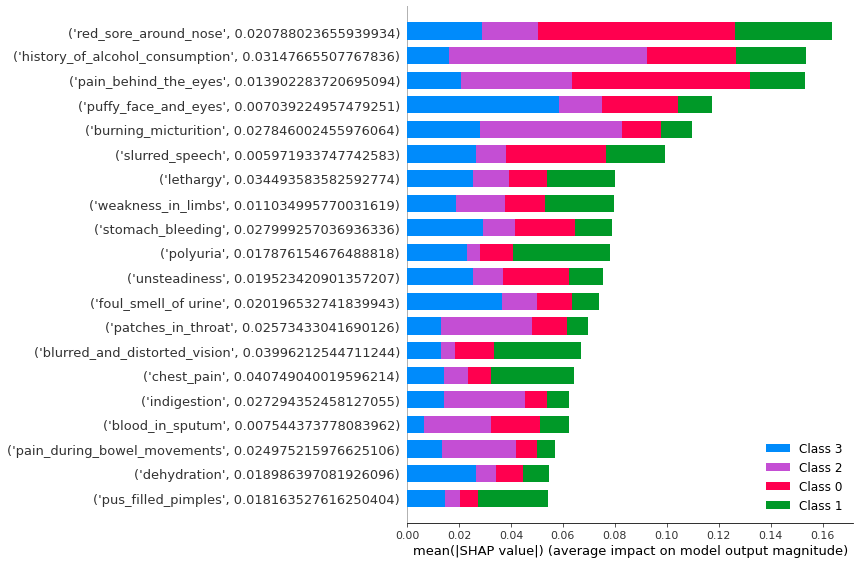

In [70]:
shap.summary_plot(shap_values, X_test2, features)

Since there is disagreement between SHAP and recursively dropping features to assess importance, and attempting to drop further features does not provide a benefit. We will stop tuning the model here. Overall the ability to classify the level of triage required for 41 distinct diseases from 36 self-diagnosable symptoms with 89% is signficiant first step towards developing a model that can be used to help patients to conduct self-triage when deciding to how quickly to seek medical care for their conditions. 

# Final Model Results

In [71]:
disease.head()

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,prognosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 789   87    0  123
2                  93  593    0   31
3                   3   13  957   13
4                  14    5    8  961


In [73]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9024390243902439

In [74]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.8943089430894309

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.79      0.83       999
           2       0.85      0.83      0.84       717
           3       0.99      0.97      0.98       986
           4       0.85      0.97      0.91       988

    accuracy                           0.89      3690
   macro avg       0.89      0.89      0.89      3690
weighted avg       0.90      0.89      0.89      3690

